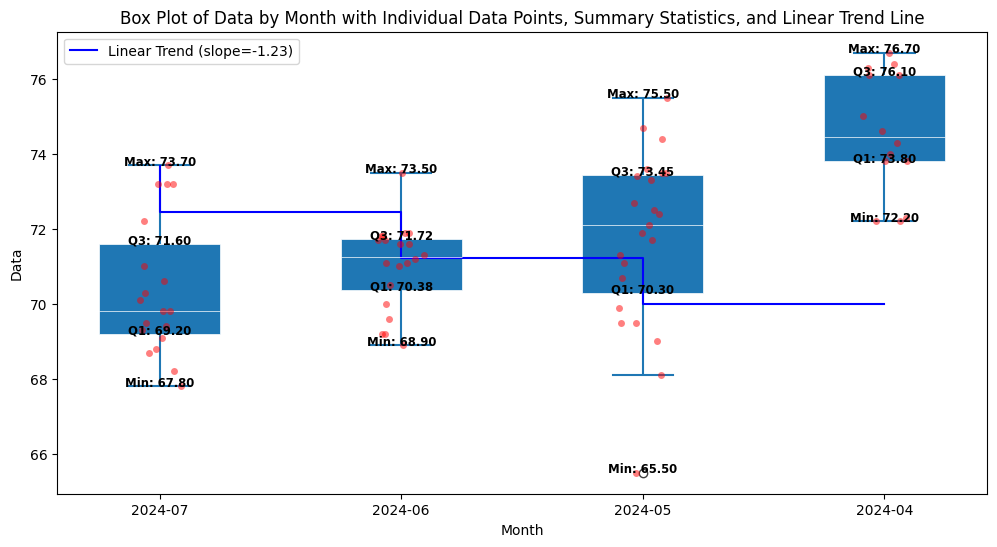

In [28]:
import ast
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

# Loading Data and cleaning data
data = pd.read_csv("hf://datasets/Nhule0502/Young_data/Financial_data.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date' column
data['Month'] = data['Date'].dt.to_period('M').astype(str)

# Create a box plot for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Data', data=data, showfliers=True, width=0.5,
            medianprops={"color": "white", "linewidth": 0.5},
            boxprops={"facecolor": "C0", "edgecolor": "white", "linewidth": 0.5},
            whiskerprops={"color": "C0", "linewidth": 1.5},
            capprops={"color": "C0", "linewidth": 1.5})

# Add the individual data points
sns.stripplot(x='Month', y='Data', data=data, color='red', alpha=0.5, jitter=True)

# Calculate summary statistics and add annotations
for month in data['Month'].unique():
    month_data = data[data['Month'] == month]['Data']
    min_val = month_data.min()
    max_val = month_data.max()
    q1 = month_data.quantile(0.25)
    q3 = month_data.quantile(0.75)
    
    plt.text(data['Month'].unique().tolist().index(month), min_val, f'Min: {min_val:.2f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')
    plt.text(data['Month'].unique().tolist().index(month), max_val, f'Max: {max_val:.2f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')
    plt.text(data['Month'].unique().tolist().index(month), q1, f'Q1: {q1:.2f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')
    plt.text(data['Month'].unique().tolist().index(month), q3, f'Q3: {q3:.2f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')

# Add a linear trend line
data['Month_Num'] = (data['Date'].dt.year - data['Date'].dt.year.min()) * 12 + data['Date'].dt.month
slope, intercept = np.polyfit(data['Month_Num'], data['Data'], 1)
trendline = intercept + slope * data['Month_Num']

# Sort data by date for the trend line plot
sorted_data = data.sort_values('Date')

# Plot the trend line
plt.plot(sorted_data['Month'], trendline, color='blue', label=f'Linear Trend (slope={slope:.2f})')

# Set title and labels
plt.title('Box Plot of Data by Month with Individual Data Points, Summary Statistics, and Linear Trend Line')
plt.xlabel('Month')
plt.ylabel('Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()
